In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")
X = dataset.iloc[:,1:4].values
Y = dataset.iloc[:,4].values
print(X)
print(Y)

[['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [20]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
print(X)

[[0.0e+00 1.0e+00 1.9e+01 1.9e+04]
 [0.0e+00 1.0e+00 3.5e+01 2.0e+04]
 [1.0e+00 0.0e+00 2.6e+01 4.3e+04]
 ...
 [1.0e+00 0.0e+00 5.0e+01 2.0e+04]
 [0.0e+00 1.0e+00 3.6e+01 3.3e+04]
 [1.0e+00 0.0e+00 4.9e+01 3.6e+04]]


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.02020406  1.02020406 -1.78179743 -1.49004624]
 [-1.02020406  1.02020406 -0.25358736 -1.46068138]
 [ 0.98019606 -0.98019606 -1.11320552 -0.78528968]
 ...
 [ 0.98019606 -0.98019606  1.17910958 -1.46068138]
 [-1.02020406  1.02020406 -0.15807423 -1.07893824]
 [ 0.98019606 -0.98019606  1.08359645 -0.99084367]]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


生成混淆矩阵

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[65  3]
 [ 6 26]]


可视化

存在问题，原模型预测的时候的特征为4维，可视化只能前两维

使用后两维重新训练一下模型，前两维是onehot生成的

或者用前两维做显示？但是没有后两位的数据啊

In [71]:
classifier_1 = LogisticRegression()
classifier_1.fit(X_train[:,[2,3]], Y_train)
Y_pred_1 = classifier_1.predict(X_test[:,[2,3]])
print(Y_pred_1)
print(Y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [59]:
classifier_1.predict(np.array([X1.ravel(), X2.ravel()]).T)

array([0, 0, 0, ..., 0, 0, 0])

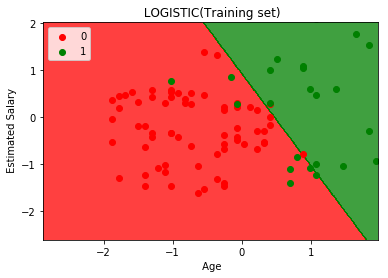

In [92]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 2].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                     np.arange(start=X_set[:,3].min()-1, stop=X_set[:,1].max()+1, step=0.01))
#np.mashgrid生成了分别以X_set的前两维为行列的矩阵
#使用contourf绘制填充等高线
#contourf(x, y, z, 等高线条数，cmap=颜色映射)，对于逻辑回归，此时分类等高线只有0，1两种高度，所以使用
#预测函数作为X的高度,alpha为颜色深浅
#ravel 将矩阵压平为向量，并且修改其中的值对原矩阵有效
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max()) #坐标轴范围
plt.ylim(X2.min(), X2.max())
#画出所有x_train中的点
#Y_set ==j返回的是满足条件的点的序号
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 2], X_set[Y_set ==j, 3],
               c= ListedColormap(('red', 'green'))(i), label=j)
plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

效果还可以